In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the data

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv(r'/content/drive/MyDrive/CodeHimalaya/nepali-news-dataset.csv', encoding='utf-8')

In [64]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [65]:
df

content  \
0      कालीगण्डकी करिडोरमा पर्ने सेती भिरमा लरी प्लेट...   
1      ट्याक्टर दुर्घटना हुँदा बैतडीमा दुई जनाको मृत्...   
2      भक्तपुरमा आज बिहान सवारी दुर्घटना हँदा एक जनाक...   
3      बैतडी बिहीवार ट्याक्टर दुर्घटना हुँदा चालकको घ...   
4      बैतडीको सुनर्या गाउँपालिका–७ आलुगैरामा जिप दुर...   
...                                                  ...   
61340  काठमाडौँ । मेगा बैंक नेपाल लिमिटेडले ‘मेगा रेम...   
61341  काठमाडौं । नेपालको विश्वसनीय इलेक्ट्रोनिक्स ब्...   
61342  नेपाल राष्ट्र बैंकले २०७७ असोज मसान्तभित्रमा ए...   
61343  काठमाडौं । साना–साना गल्ली, गल्लीभित्र सानो पस...   
61344  काठमाडौं । डिजिटल फन्ड ट्रान्फरको दुनियाँमा कन...   

                                                 heading main_topic  
0      कालीगण्डकी करिडोरमा पर्ने सेती भिरबाट ट्रक खस्...  accidents  
1      ट्याक्टर दुर्घटना हुँदा दुई जनाको घटनास्थलमै म...  accidents  
2      भक्तपुरमा भैंसी बोकेको ट्रक दुर्घटना, ढोकाले च...  accidents  
3                 ट्याक्टर दुर्घटना हुुँदा चालकको मृत्यु  accidents  
4      बैतडीमा जिप दुर्घटना : चालकको घटनास्थलमै मृत्य...  accidents  
...                                                  ...        ...  
61340              मेगा बैंकले ल्यायो हातैमा रेमिट्यान्स     wealth  
61341              सामसङ QLED टिभिको प्रि–बुकिङ्ग खुल्ला     wealth  
61342  बैंकहरूले सार्वजनिक गरे स्थिर ब्याजदर, कसको कति ?     wealth  
61343  चम्किँदै सस्तो बजार, ब्रान्डेड सामान बेच्नेहरु...     wealth  
61344     फन्ड ट्रान्फरमा लोकप्रिय बन्दै ‘कनेक्ट आईपीएस’     wealth  

[61345 rows x 3 columns]

In [66]:
df.sample(1, random_state = 1).values

array([[': नेकपा माओवादीका कार्यकर्ताले गएराति ११ बजे सेभ द चिल्ड्रेनको कार्यालय चौतारामा आक्रमणको प्रयास गरेका छन्।\xa0 \n \nप्रहरीका अनुसार पाँच/छ जनाको समूहमा आएका नेत्रविक्रम चन्द नेतृत्वको दलका कार्यकर्ताले चौतारास्थित कार्यालयमा प्लास्टिकको बोतलमा पेट्रोल हाली आक्रमण गरेको र आक्रमणबाट परिसरभित्र पार्किङ गरिराखिएको बा १३ च ५९१४ नको स्कार्पियो गाडीमा सामान्य क्षति पुगेको छ।\xa0 \n \nयसैबीच सो दलले विज्ञप्ति जारी गरी भूकम्पपछि जिल्लामा पुनःनिर्माण र राहत वितरण गर्दैआएका गैरसरकारी संस्था सेवामुखीभन्दा पनि कमाउमुखी बन्दै गएका कारण आक्रमण गरेको जनाएको छ।\xa0 \n \nविज्ञप्तिमा भनिएको छ– “निश्चित व्यापारीसँग मिलेर कमिसन लिई जनतालाई निश्चित पसलमा सामग्री खरिद गर्न बाध्य बनाएको, सामानको मूल्य साबिकको भन्दा दोब्बर पार्न लगाएको, पाँच अर्बभन्दा बढीका काम गरेपनि कुनै हिसाब किताब पारदर्शी नभएको र संस्थाले वितरण गरेको राहत सामग्री गुणस्तरहीन भएकाले आक्रमण गरेका हौं।”',
        '\u200bसेभ द चिल्ड्रेन कार्यालयमा आक्रमण', 'accidents']],
      dtype=object)

It looks like the content column contains the detailed information about a particular news. Similarly, the heading column probably contains the heading or the title of that particular news. The main_topic column should be our target column, as it contains the class information about which category a particular news falls into.

<b> Therefore, to perform news classification, we have 3 options.
    
    1. Use content column only, as it contains the detailed information about a particular news.
    2. Use heading column, as it contains the summary information about a particular news.
    3. Use both by concatenating two texts.
    
    
The Content column typically contains a larger amount of text compared to the Heading column, as it includes the entire news article. It provides more context and details about the news topic. On the other hand, the Heading column contains a concise summary or title of the news article. It captures the essence of the news in a shorter form. 
    
The Content column may have more detailed information, including key points, facts, quotes, and analysis. This could potentially provide more clues and context for accurate classification. However, it also means dealing with larger text inputs and potentially longer processing times. 
    
Before deciding, lets look at the number of articles per news category.

In [67]:
df.shape, df.drop_duplicates().shape

((61345, 3), (61345, 3))

Good to know that there are no duplicates in the dataset.

In [68]:
number_of_articles_per_class = df.main_topic.value_counts().reset_index()
number_of_articles_per_class.sort_values("main_topic", ascending = False, inplace = True)
number_of_articles_per_class

index  main_topic
0             politics        9068
1        entertainment        6163
2              finance        4281
3                 film        4197
4   science_technology        4007
5           literature        3950
6              society        3457
7              opinion        2991
8              tourism        2976
9             national        2965
10           migration        2951
11           corporate        2908
12           accidents        2826
13              sports        2787
14              wealth        1771
15              health        1740
16                auto        1282
17           interview        1025

Text(0, 0.5, 'News category')

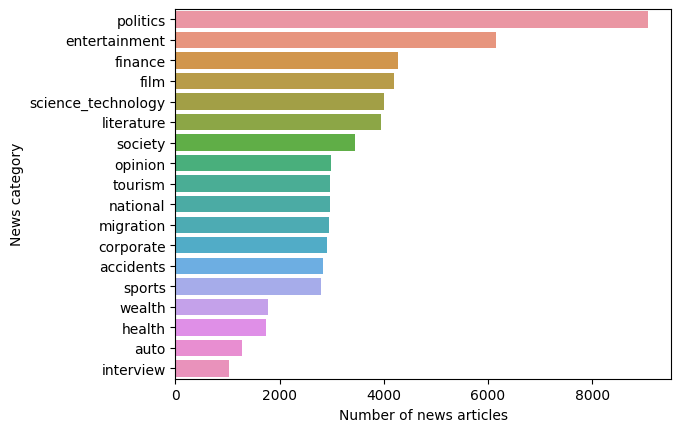

In [69]:
ax = plt.subplot()

sns.barplot(y = 'index', x = 'main_topic', data = number_of_articles_per_class)
plt.xlabel("Number of news articles")
plt.ylabel("News category")

It looks like news belonging to politics category are the most published kind in Nepal. Similarly, entertainment and finance related news are the most publised. Wealth, health and interview related news are least published. There seems to be significant class imbalance when we compare the number of data points present in politics and interview class. 

<b>Class imbalance</b> will make model being biased towards majority class, which is not good for generalization of the model.
Lets clean the texts first.

In [71]:
df

content  \
0      कालीगण्डकी करिडोरमा पर्ने सेती भिरमा लरी प्लेट...   
1      ट्याक्टर दुर्घटना हुँदा बैतडीमा दुई जनाको मृत्...   
2      भक्तपुरमा आज बिहान सवारी दुर्घटना हँदा एक जनाक...   
3      बैतडी बिहीवार ट्याक्टर दुर्घटना हुँदा चालकको घ...   
4      बैतडीको सुनर्या गाउँपालिका–७ आलुगैरामा जिप दुर...   
...                                                  ...   
61340  काठमाडौँ । मेगा बैंक नेपाल लिमिटेडले ‘मेगा रेम...   
61341  काठमाडौं । नेपालको विश्वसनीय इलेक्ट्रोनिक्स ब्...   
61342  नेपाल राष्ट्र बैंकले २०७७ असोज मसान्तभित्रमा ए...   
61343  काठमाडौं । साना–साना गल्ली, गल्लीभित्र सानो पस...   
61344  काठमाडौं । डिजिटल फन्ड ट्रान्फरको दुनियाँमा कन...   

                                                 heading main_topic  
0      कालीगण्डकी करिडोरमा पर्ने सेती भिरबाट ट्रक खस्...  accidents  
1      ट्याक्टर दुर्घटना हुँदा दुई जनाको घटनास्थलमै म...  accidents  
2      भक्तपुरमा भैंसी बोकेको ट्रक दुर्घटना, ढोकाले च...  accidents  
3                 ट्याक्टर दुर्घटना हुुँदा चालकको मृत्यु  accidents  
4      बैतडीमा जिप दुर्घटना : चालकको घटनास्थलमै मृत्य...  accidents  
...                                                  ...        ...  
61340              मेगा बैंकले ल्यायो हातैमा रेमिट्यान्स     wealth  
61341              सामसङ QLED टिभिको प्रि–बुकिङ्ग खुल्ला     wealth  
61342  बैंकहरूले सार्वजनिक गरे स्थिर ब्याजदर, कसको कति ?     wealth  
61343  चम्किँदै सस्तो बजार, ब्रान्डेड सामान बेच्नेहरु...     wealth  
61344     फन्ड ट्रान्फरमा लोकप्रिय बन्दै ‘कनेक्ट आईपीएस’     wealth  

[61345 rows x 3 columns]

<b> Lets look at the wordclouds for each news categories below.

In a word cloud visualization, the size of each word corresponds to its frequency or importance in the text. The words with the highest frequency in the dataset will have the largest size in the word cloud, making them more prominent and visually emphasized.

  0%|          | 0/18 [00:00<?, ?it/s]

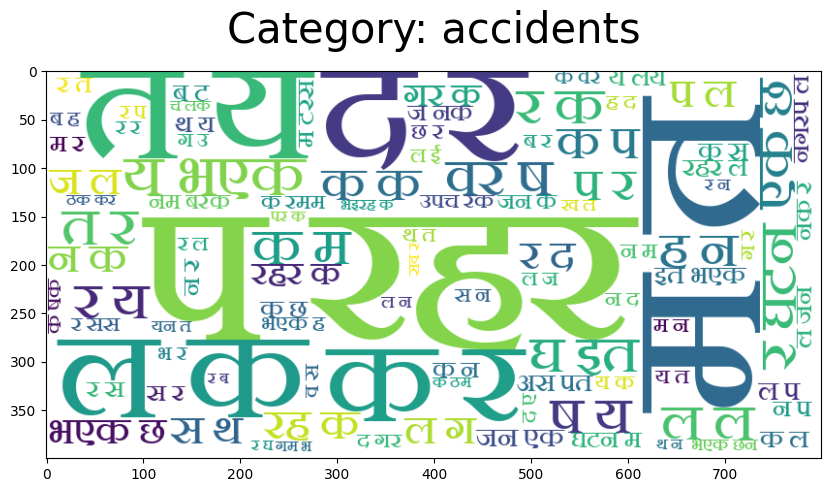

  6%|▌         | 1/18 [00:04<01:08,  4.04s/it]

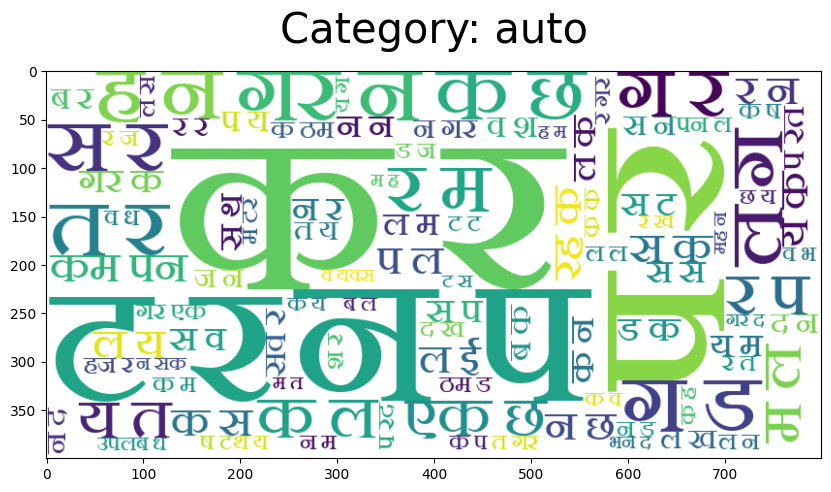

 11%|█         | 2/18 [00:08<01:11,  4.46s/it]

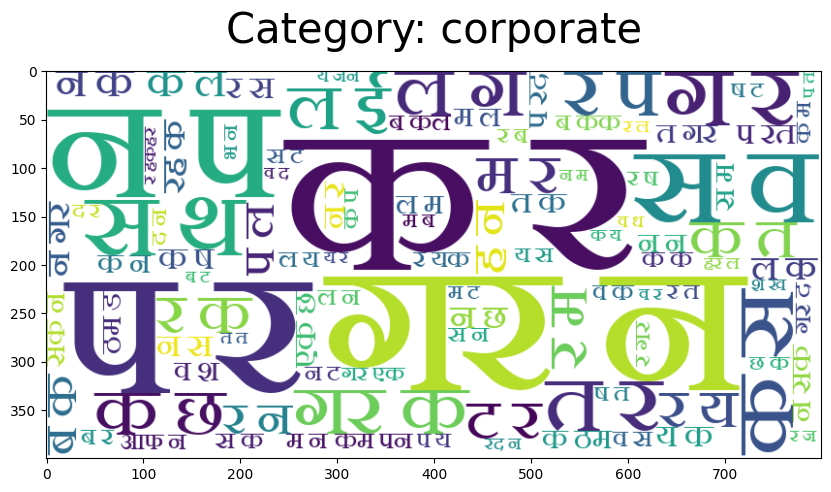

 17%|█▋        | 3/18 [00:16<01:30,  6.03s/it]

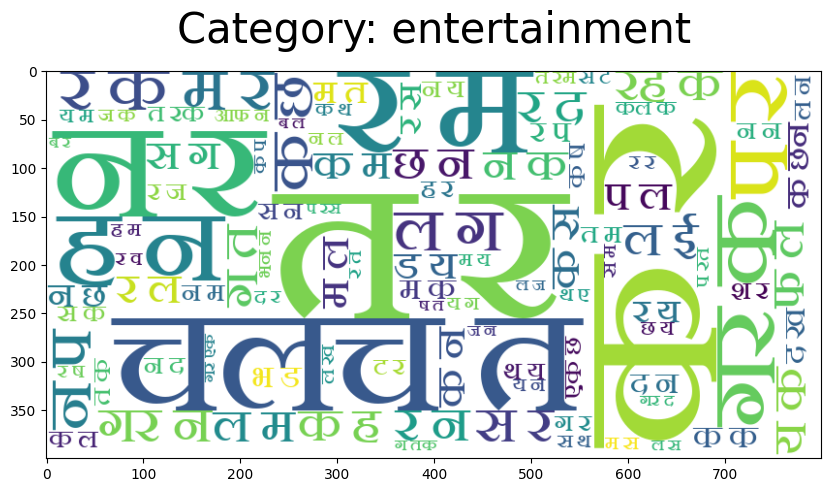

 22%|██▏       | 4/18 [00:27<01:52,  8.03s/it]

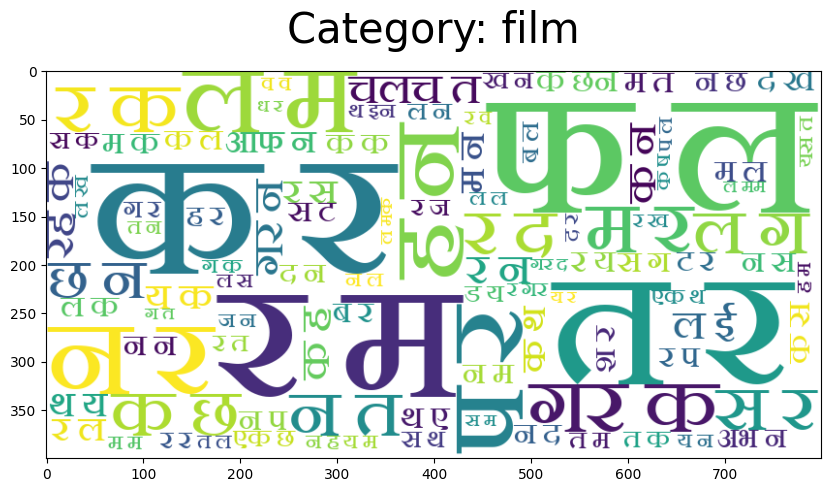

 28%|██▊       | 5/18 [00:34<01:40,  7.72s/it]

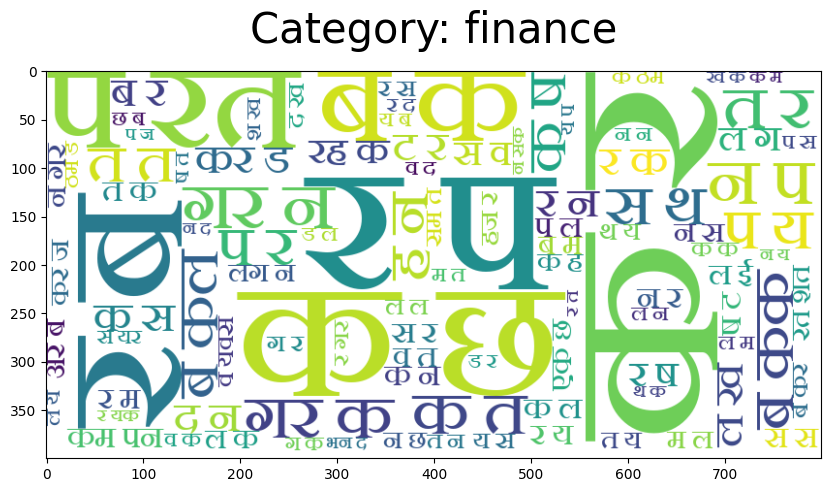

 33%|███▎      | 6/18 [00:44<01:39,  8.26s/it]

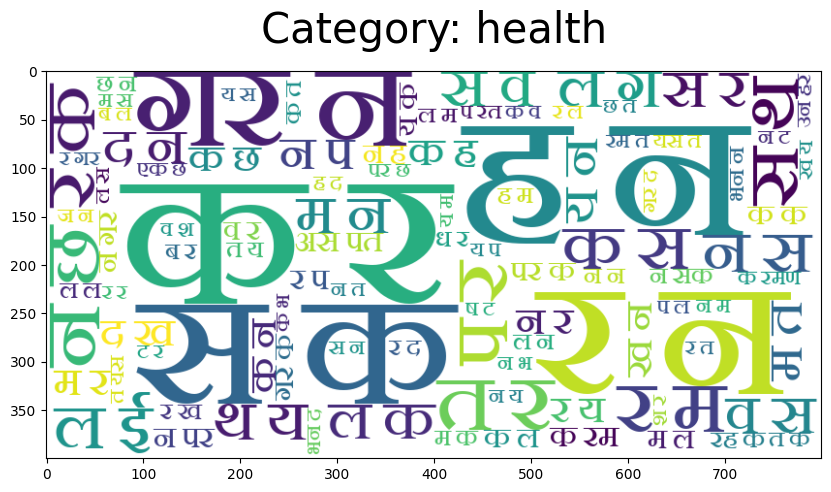

 39%|███▉      | 7/18 [00:51<01:26,  7.86s/it]

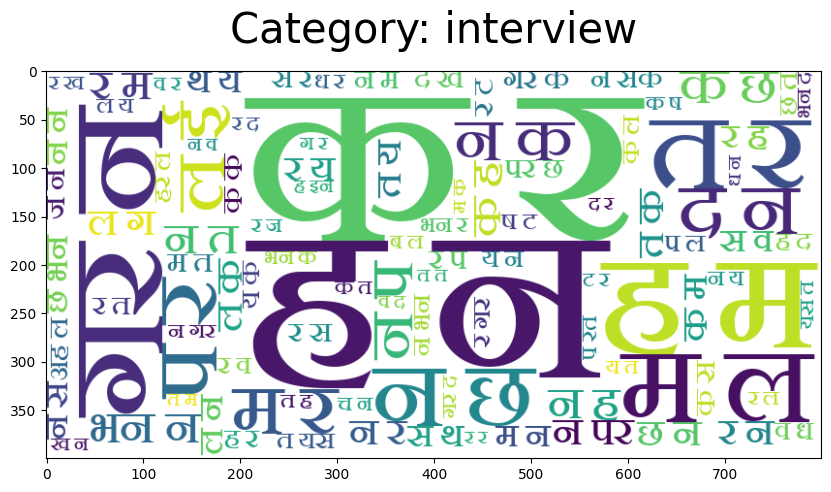

 44%|████▍     | 8/18 [01:03<01:33,  9.36s/it]

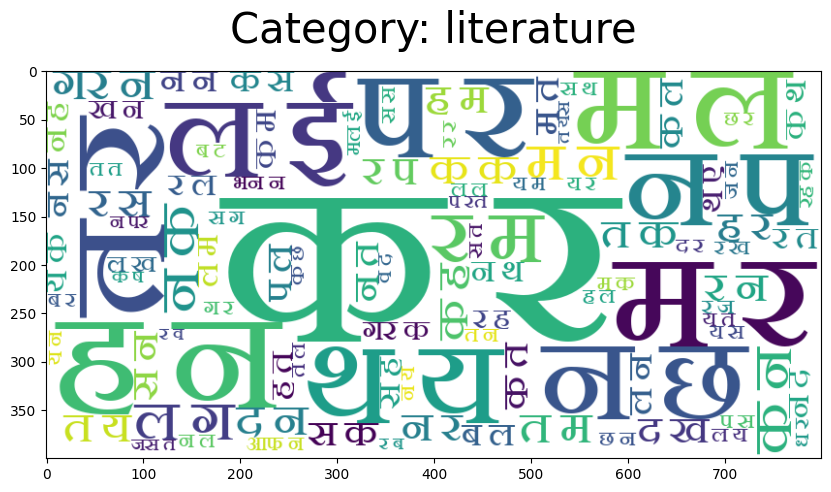

 50%|█████     | 9/18 [01:21<01:48, 12.04s/it]

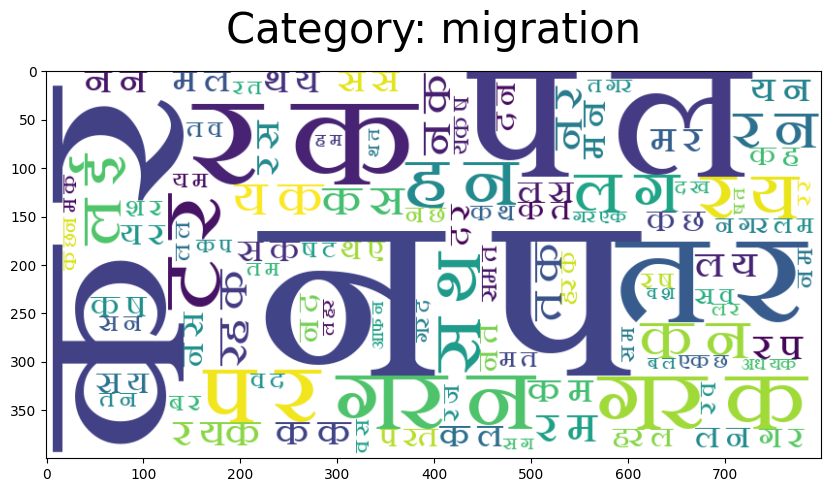

 56%|█████▌    | 10/18 [01:29<01:25, 10.63s/it]

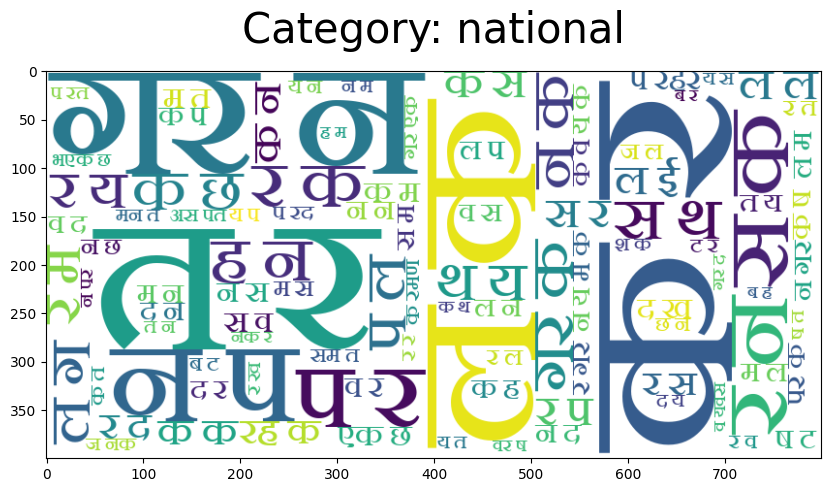

 61%|██████    | 11/18 [01:37<01:09,  9.94s/it]

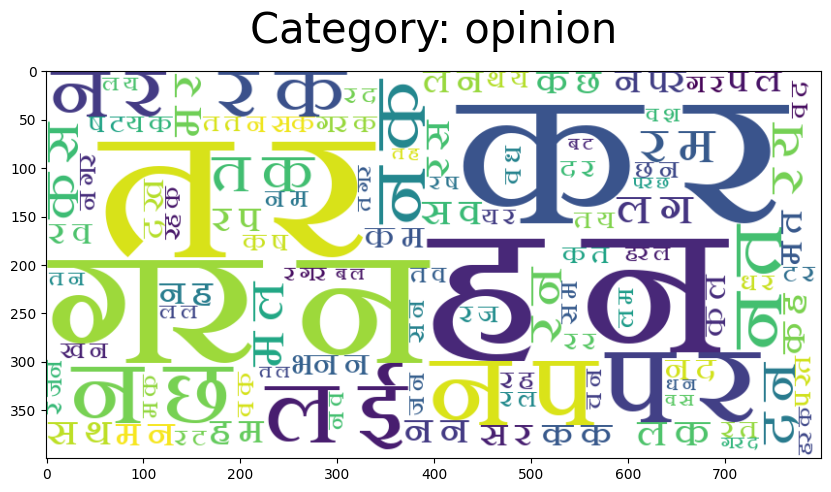

 67%|██████▋   | 12/18 [02:18<01:56, 19.36s/it]

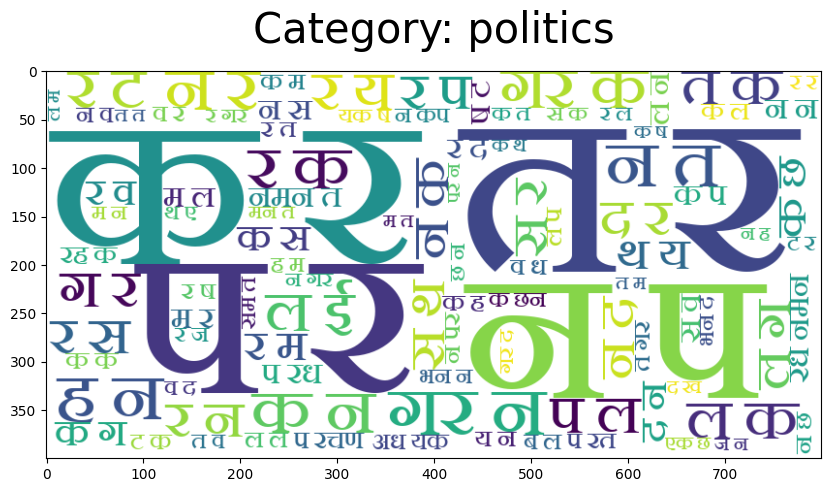

 72%|███████▏  | 13/18 [02:47<01:50, 22.12s/it]

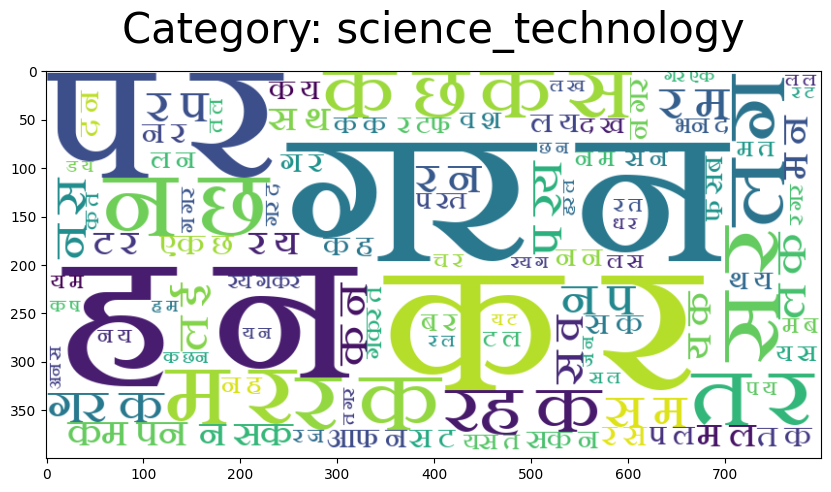

 78%|███████▊  | 14/18 [03:02<01:20, 20.01s/it]

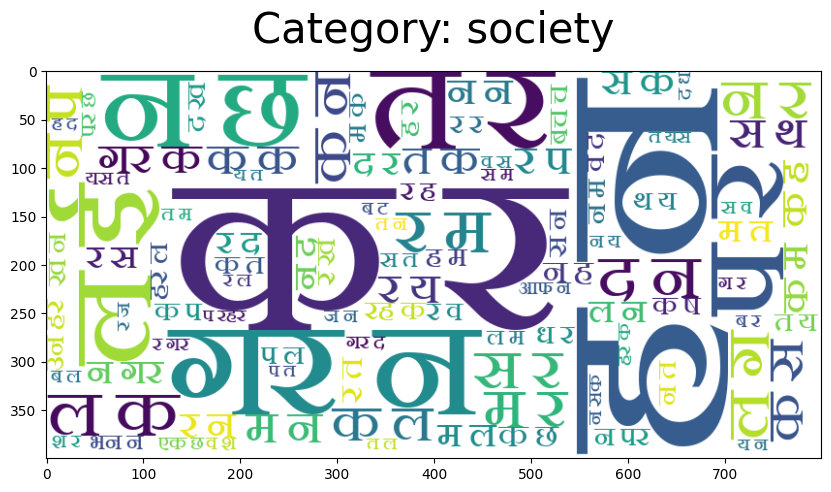

 83%|████████▎ | 15/18 [03:15<00:53, 17.86s/it]

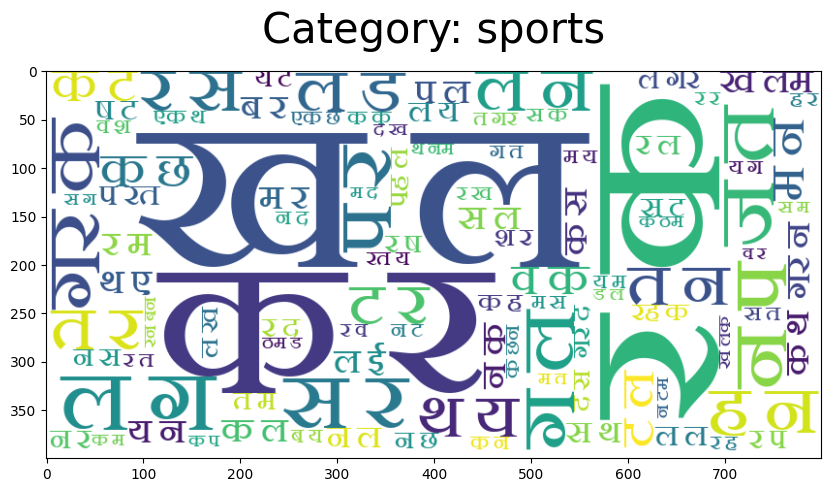

 89%|████████▉ | 16/18 [03:22<00:29, 14.70s/it]

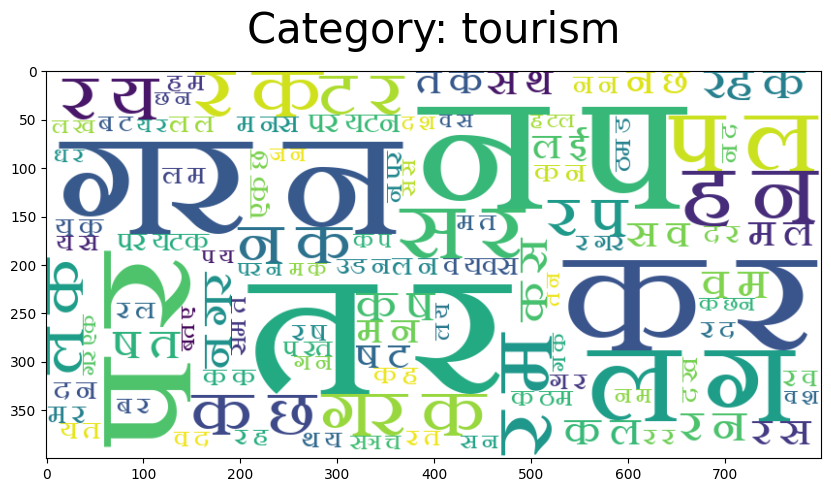

 94%|█████████▍| 17/18 [03:32<00:13, 13.24s/it]

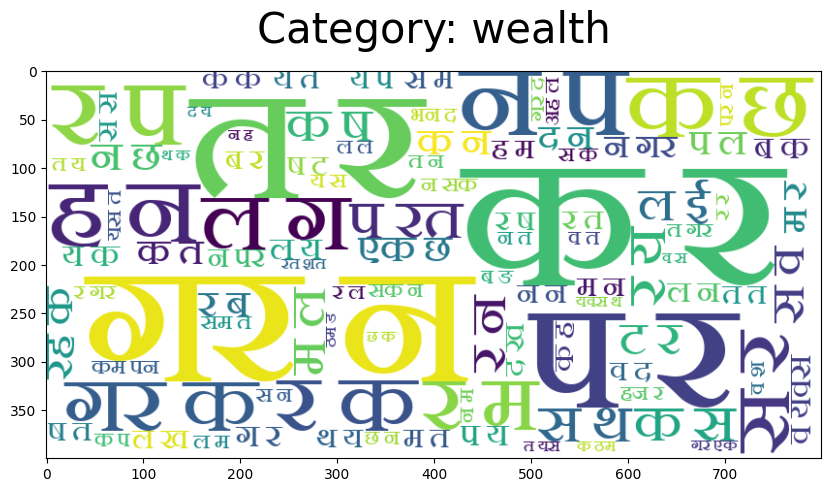

100%|██████████| 18/18 [03:40<00:00, 12.25s/it]


In [77]:
for val in tqdm(df.main_topic.unique()):
    df_local = df[df.main_topic == val]
    wordcloud = WordCloud(font_path=r"Aparajita.ttf", background_color='white', max_words=100, width=800, height=400).generate(' '.join(df_local.content.values))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Category: "+ val, fontsize = 30, pad = 20)
    # plt.axis('off')
    plt.show()
    # break

<b> The wordclouds above don't seem to cleary showcase words with highest frequencies for each news category. The original wordcloud didn't support this and I had to download fonts from thirdparty sources, but I kept on getting these unclear wordclouds regardless of different fonts. Nontheless, I kept these plots.

# Data Cleaning

In [78]:
nepali_sentence = df.content.iloc[0];nepali_sentence

'कालीगण्डकी करिडोरमा पर्ने सेती भिरमा लरी प्लेटफार्म टेलर (ट्रक) दुर्घटना हुँदा चालकसहित तीनको मृत्यु भएको छ। नवलपरासी (बर्दघाट-सुस्तापूर्व)को गैँडाकोट–३ को भोक्रेफाँटस्थित सेती भिरबाट बुधवार बिहान ना ३ ख ५३३९ नम्बरको ट्रक सय मिटर तल खसेको प्रहरीले जनाएको छ। लोहनी कन्स्ट्रक्सनको सिमेन्ट बोक्ने ट्रक बुलिङटार गाउँपालिकाको खामबेसीबाट फर्कदै गर्दा दुर्घटनामा परेको जिल्ला प्रहरी कार्यालयका प्रवक्ता मोहनबहादुर खाँणले जानकारी दिए। दुर्घटनामा परी ट्रक चालक मकवानपुरको हेटौँडा-१७ का ४५ वर्षीय सुरेश भुजेल, सोही स्थानका ३५ वर्षीय बलराम श्रेष्ठ र पर्साको ठोरी घर भएका ५० वर्षीय भीमबहादुर तामाङको मृत्यु भएको खाँणले बताए। दुर्घटनाको कारण पत्ता नलागे पनि ट्रक अनियन्त्रित भई पल्टिएको हुनसक्ने प्रहरीले जनाएको छ।'

## Converting to lowercase

In this case, since Nepali characters do not have well-defined uppercase or lowercase forms, the word remains the same in both uppercase and lowercase representations. Unlike in english language where ENGLISH would be uppercase and english would be lowercase, this distictions does not generally apply in nepali words. Therefore this sections will be passed.

In [79]:
def lower_order(text):
    return text

## Removing URLs from the text

In [80]:
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [81]:
remove_urls(nepali_sentence+" https://sujanneupane.com")

'कालीगण्डकी करिडोरमा पर्ने सेती भिरमा लरी प्लेटफार्म टेलर (ट्रक) दुर्घटना हुँदा चालकसहित तीनको मृत्यु भएको छ। नवलपरासी (बर्दघाट-सुस्तापूर्व)को गैँडाकोट–३ को भोक्रेफाँटस्थित सेती भिरबाट बुधवार बिहान ना ३ ख ५३३९ नम्बरको ट्रक सय मिटर तल खसेको प्रहरीले जनाएको छ। लोहनी कन्स्ट्रक्सनको सिमेन्ट बोक्ने ट्रक बुलिङटार गाउँपालिकाको खामबेसीबाट फर्कदै गर्दा दुर्घटनामा परेको जिल्ला प्रहरी कार्यालयका प्रवक्ता मोहनबहादुर खाँणले जानकारी दिए। दुर्घटनामा परी ट्रक चालक मकवानपुरको हेटौँडा-१७ का ४५ वर्षीय सुरेश भुजेल, सोही स्थानका ३५ वर्षीय बलराम श्रेष्ठ र पर्साको ठोरी घर भएका ५० वर्षीय भीमबहादुर तामाङको मृत्यु भएको खाँणले बताए। दुर्घटनाको कारण पत्ता नलागे पनि ट्रक अनियन्त्रित भई पल्टिएको हुनसक्ने प्रहरीले जनाएको छ। '

This custom function to remove URLs does work.

## Remove HTML tags

In [82]:
def rm_html(text):
    return re.sub(r'<[^>]+>', '', text)

In [83]:
rm_html(nepali_sentence+" <html><br>")

'कालीगण्डकी करिडोरमा पर्ने सेती भिरमा लरी प्लेटफार्म टेलर (ट्रक) दुर्घटना हुँदा चालकसहित तीनको मृत्यु भएको छ। नवलपरासी (बर्दघाट-सुस्तापूर्व)को गैँडाकोट–३ को भोक्रेफाँटस्थित सेती भिरबाट बुधवार बिहान ना ३ ख ५३३९ नम्बरको ट्रक सय मिटर तल खसेको प्रहरीले जनाएको छ। लोहनी कन्स्ट्रक्सनको सिमेन्ट बोक्ने ट्रक बुलिङटार गाउँपालिकाको खामबेसीबाट फर्कदै गर्दा दुर्घटनामा परेको जिल्ला प्रहरी कार्यालयका प्रवक्ता मोहनबहादुर खाँणले जानकारी दिए। दुर्घटनामा परी ट्रक चालक मकवानपुरको हेटौँडा-१७ का ४५ वर्षीय सुरेश भुजेल, सोही स्थानका ३५ वर्षीय बलराम श्रेष्ठ र पर्साको ठोरी घर भएका ५० वर्षीय भीमबहादुर तामाङको मृत्यु भएको खाँणले बताए। दुर्घटनाको कारण पत्ता नलागे पनि ट्रक अनियन्त्रित भई पल्टिएको हुनसक्ने प्रहरीले जनाएको छ। '

## Remove Emojis



In [84]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', string)

In [85]:
text_with_emoji =  nepali_sentence+ " 😊 🍕🍕"
text_with_emoji

'कालीगण्डकी करिडोरमा पर्ने सेती भिरमा लरी प्लेटफार्म टेलर (ट्रक) दुर्घटना हुँदा चालकसहित तीनको मृत्यु भएको छ। नवलपरासी (बर्दघाट-सुस्तापूर्व)को गैँडाकोट–३ को भोक्रेफाँटस्थित सेती भिरबाट बुधवार बिहान ना ३ ख ५३३९ नम्बरको ट्रक सय मिटर तल खसेको प्रहरीले जनाएको छ। लोहनी कन्स्ट्रक्सनको सिमेन्ट बोक्ने ट्रक बुलिङटार गाउँपालिकाको खामबेसीबाट फर्कदै गर्दा दुर्घटनामा परेको जिल्ला प्रहरी कार्यालयका प्रवक्ता मोहनबहादुर खाँणले जानकारी दिए। दुर्घटनामा परी ट्रक चालक मकवानपुरको हेटौँडा-१७ का ४५ वर्षीय सुरेश भुजेल, सोही स्थानका ३५ वर्षीय बलराम श्रेष्ठ र पर्साको ठोरी घर भएका ५० वर्षीय भीमबहादुर तामाङको मृत्यु भएको खाँणले बताए। दुर्घटनाको कारण पत्ता नलागे पनि ट्रक अनियन्त्रित भई पल्टिएको हुनसक्ने प्रहरीले जनाएको छ। 😊 🍕🍕'

In [86]:
emoji_removed = remove_emoji(text_with_emoji)
print(emoji_removed)

कालीगण्डकी करिडोरमा पर्ने सेती भिरमा लरी प्लेटफार्म टेलर (ट्रक) दुर्घटना हुँदा चालकसहित तीनको मृत्यु भएको छ। नवलपरासी (बर्दघाट-सुस्तापूर्व)को गैँडाकोट–३ को भोक्रेफाँटस्थित सेती भिरबाट बुधवार बिहान ना ३ ख ५३३९ नम्बरको ट्रक सय मिटर तल खसेको प्रहरीले जनाएको छ। लोहनी कन्स्ट्रक्सनको सिमेन्ट बोक्ने ट्रक बुलिङटार गाउँपालिकाको खामबेसीबाट फर्कदै गर्दा दुर्घटनामा परेको जिल्ला प्रहरी कार्यालयका प्रवक्ता मोहनबहादुर खाँणले जानकारी दिए। दुर्घटनामा परी ट्रक चालक मकवानपुरको हेटौँडा-१७ का ४५ वर्षीय सुरेश भुजेल, सोही स्थानका ३५ वर्षीय बलराम श्रेष्ठ र पर्साको ठोरी घर भएका ५० वर्षीय भीमबहादुर तामाङको मृत्यु भएको खाँणले बताए। दुर्घटनाको कारण पत्ता नलागे पनि ट्रक अनियन्त्रित भई पल्टिएको हुनसक्ने प्रहरीले जनाएको छ।    


## Remove Unwanted Characters



In [87]:
def remove_unwanted_characters_nepali(document):
    # remove user mentions
    document = re.sub("@[^\s]+", " ", document)
    # remove hashtags
    document = re.sub("#[^\s]+", "", document)
    # remove punctuation (except for Nepali Unicode characters)
    document = re.sub("[^\u0900-\u097F0-9A-Za-z\s]", "", document)
    # remove emojis
    document = remove_emoji(document)
    
    # remove double spaces
    document = document.replace('  ', "")
    document = re.sub(r"[^\w\s]", "", document)
    return document.strip()

In [88]:
text = nepali_sentence +" @! #";text

'कालीगण्डकी करिडोरमा पर्ने सेती भिरमा लरी प्लेटफार्म टेलर (ट्रक) दुर्घटना हुँदा चालकसहित तीनको मृत्यु भएको छ। नवलपरासी (बर्दघाट-सुस्तापूर्व)को गैँडाकोट–३ को भोक्रेफाँटस्थित सेती भिरबाट बुधवार बिहान ना ३ ख ५३३९ नम्बरको ट्रक सय मिटर तल खसेको प्रहरीले जनाएको छ। लोहनी कन्स्ट्रक्सनको सिमेन्ट बोक्ने ट्रक बुलिङटार गाउँपालिकाको खामबेसीबाट फर्कदै गर्दा दुर्घटनामा परेको जिल्ला प्रहरी कार्यालयका प्रवक्ता मोहनबहादुर खाँणले जानकारी दिए। दुर्घटनामा परी ट्रक चालक मकवानपुरको हेटौँडा-१७ का ४५ वर्षीय सुरेश भुजेल, सोही स्थानका ३५ वर्षीय बलराम श्रेष्ठ र पर्साको ठोरी घर भएका ५० वर्षीय भीमबहादुर तामाङको मृत्यु भएको खाँणले बताए। दुर्घटनाको कारण पत्ता नलागे पनि ट्रक अनियन्त्रित भई पल्टिएको हुनसक्ने प्रहरीले जनाएको छ। @! #'

In [89]:
remove_unwanted_characters_nepali(text)

'कलगणडक करडरम परन सत भरम लर पलटफरम टलर टरक दरघटन हद चलकसहत तनक मतय भएक छ नवलपरस बरदघटससतपरवक गडकट३ क भकरफटसथत सत भरबट बधवर बहन न ३ ख ५३३९ नमबरक टरक सय मटर तल खसक परहरल जनएक छ लहन कनसटरकसनक समनट बकन टरक बलङटर गउपलकक खमबसबट फरकद गरद दरघटनम परक जलल परहर करयलयक परवकत महनबहदर खणल जनकर दए दरघटनम पर टरक चलक मकवनपरक हटड१७ क ४५ वरषय सरश भजल सह सथनक ३५ वरषय बलरम शरषठ र परसक ठर घर भएक ५० वरषय भमबहदर तमङक मतय भएक खणल बतए दरघटनक करण पतत नलग पन टरक अनयनतरत भई पलटएक हनसकन परहरल जनएक छ'

## Remove unnecessary whitespaces

In [90]:
def rm_whitespaces(text):
    return re.sub(r' +', ' ', text)

In [91]:
rm_whitespaces(nepali_sentence+"           "+"New whitespaces were added before this english sentence")

'कालीगण्डकी करिडोरमा पर्ने सेती भिरमा लरी प्लेटफार्म टेलर (ट्रक) दुर्घटना हुँदा चालकसहित तीनको मृत्यु भएको छ। नवलपरासी (बर्दघाट-सुस्तापूर्व)को गैँडाकोट–३ को भोक्रेफाँटस्थित सेती भिरबाट बुधवार बिहान ना ३ ख ५३३९ नम्बरको ट्रक सय मिटर तल खसेको प्रहरीले जनाएको छ। लोहनी कन्स्ट्रक्सनको सिमेन्ट बोक्ने ट्रक बुलिङटार गाउँपालिकाको खामबेसीबाट फर्कदै गर्दा दुर्घटनामा परेको जिल्ला प्रहरी कार्यालयका प्रवक्ता मोहनबहादुर खाँणले जानकारी दिए। दुर्घटनामा परी ट्रक चालक मकवानपुरको हेटौँडा-१७ का ४५ वर्षीय सुरेश भुजेल, सोही स्थानका ३५ वर्षीय बलराम श्रेष्ठ र पर्साको ठोरी घर भएका ५० वर्षीय भीमबहादुर तामाङको मृत्यु भएको खाँणले बताए। दुर्घटनाको कारण पत्ता नलागे पनि ट्रक अनियन्त्रित भई पल्टिएको हुनसक्ने प्रहरीले जनाएको छ। New whitespaces were added before this english sentence'

## Remove Punctutations



In [92]:
def remove_punctuations_nepali(sentence):
    punctuations = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~।॥"""
    return re.sub('[' + re.escape(punctuations) + ']', '', sentence)

In [93]:
text = "नमस्ते! के छ तपाईंको नाम? म सन्चै खुशी छु।"
cleaned_text = remove_punctuations_nepali(text)
print(cleaned_text)

नमस्ते के छ तपाईंको नाम म सन्चै खुशी छु


## Remove Stopwords



In [94]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [95]:
stop_words = set(stopwords.words('nepali'));list(stop_words)[:10]

['अरुलाई',
 'एकदम',
 'पाँचौं',
 'भित्री',
 'मेरो',
 'राम्रो',
 'बिशेष',
 'जसले',
 'जस्तोसुकै',
 'देखियो']

In [96]:
custom_stopwords = ['छ', 'हो', 'ले', 'को']
stop_words.update(custom_stopwords)

In [97]:
def remove_stopwords_nepali(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# def remove_stopwords_nepali(text_tokens):
#     result_tokens = []
#     for token in text_tokens:
#         if token not in stop_words:
#             result_tokens.append(token)
#     return result_tokens

In [98]:
text = "हामीले त्यो काम गर्ने थियौं की नि?"
cleaned_text = remove_stopwords_nepali(text)
print(cleaned_text)

हामीले काम थियौं की ?


## Stemming vs Lemmatization

In stemming, we simply slice a particular word to reduce the number of duplicates; The word playing could be stemmed to play which will reduce the number of words in our vocabulary. Stemming is much faster than lammatization whereas it is not that accurate.

In Lemmatization, we have to convert each word to its root form; playing could me lemattized to play or plays to play. However, it is slower than stemming as we have to find the root word. But, this also makes it more accurate.

Unlike english langauge which could be easily lemmatized or stemmed, this feature is not available in nltk.
<b> After doing a through reseach, I found a python package called nepali-stemmer

In [99]:
!git clone https://github.com/oya163/nepali-stemmer.git

fatal: destination path 'nepali-stemmer' already exists and is not an empty directory.


In [100]:
cd nepali-stemmer

/content/nepali-stemmer


In [101]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
from nepali_stemmer.stemmer import NepStemmer
nepstem = NepStemmer()

In [103]:
nepstem.stem("नेपालको एमाले पार्टीका झोले, मण्डलेहरु अमेरिका आउने रे !")

'नेपाल को एमाले पार्टी का झोले, मण्डले हरु अमेरिका आउने रे !'

<b> The dataset that I have is not very big, which is why I preferred to use Lemmatization. But, I couldn't find the appropriate package offering such faeture for a nepali dataset. After a through reading of multiple research articles, I came accross a python package offered in this github repositiory that provided stemming in Nepali.
    
    Link to GitHub: https://github.com/oya163/nepali-stemmer

In [104]:
def nepali_stemming(text):
  return nepstem.stem(text)

In [105]:
nepstem.stem

<bound method NepStemmer.stem of <nepali_stemmer.stemmer.NepStemmer object at 0x7f9cd6724550>>

In [106]:
import pickle

# Save the NepStemmer object as a pickle file
with open('nepstem.pickle', 'wb') as file:
    pickle.dump(nepstem, file)

In [107]:
pwd

'/content/nepali-stemmer'

## Removing Nepali Numbers

Since I am doing nepali news classifcation, there may not be a necessecity to include raw nepali numbers.

In [108]:
import re

def remove_nepali_numbers(text):
    # Regular expression pattern to match numeric characters in Nepali script
    pattern = r'[०-९]'

    # Remove numeric characters using regex substitution
    text_without_numbers = re.sub(pattern, '', text)
    
    return text_without_numbers

# Example usage
nepali_text = "नेपाली न्यूज़ २०२३"
text_without_numbers = remove_nepali_numbers(nepali_text)
print(text_without_numbers)

नेपाली न्यूज़ 


## Tokenization

In [109]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

# preprocessing
def tokenize(text):
    return word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Custom Pipeline to clean text



lower_order, remove_urls, rm_html, remove_emoji, remove_unwanted_characters_nepali, rm_whitespaces, remove_punctuations_nepali, remove_stopwords_nepali, stemming, tokenize

In [110]:
def custom_cleaning_pipeline(string):   
    string = lower_order(string)
    string = remove_urls(string)
    string = rm_html(string)
    string = remove_emoji(string)
    string = remove_unwanted_characters_nepali(string)
    string = remove_punctuations_nepali(string)
    string = remove_nepali_numbers(string)
    string = rm_whitespaces(string)
    
    string = remove_stopwords_nepali(string)
    string = tokenize(string)
    string = nepali_stemming(" ".join(string))

    return string

In [111]:
# def custom_preprocessing_pipeline(string):
    
#     return stemized_text

In [112]:
text = df.content.sample(1).values[0];text

'२४ माघ, दमौली । तनहुँको बन्दीपुर–६ विमलनगरस्थित चुनपहरामा साहसिक रकक्लाइम्बिङ गर्न पर्यटकको ओइरो लाग्ने गरेको छ ।\xa0 पृथ्वी राजमार्ग छेउमै रहेको उक्त पहरो भूकम्पपछि पनि सुरक्षित रहेकाले रकक्लाइम्बिङ गर्न पर्यटकको ओइरो लाग्ने गरेको हो । अहिलेसम्म स्वदेशी एवम् विदेशी गरी ११ हजार बढी पर्यटकले चुनपहरामा रकक्लाइम्बिङ गरिसकेको विमलनगर सिद्ध गुफा विकास समितिका अध्यक्ष लालकुमार श्रेष्ठले बताए । सन् २००६ अक्टोबरदेखि रुट खोलिएको चुनपहरालाई रकक्लाइम्बिङका लागि गन्तव्यस्थल बनाउने तयारी भइरहेको जानकारी माउन्टेरिङ गाइड प्रेम गुरुङले दिए । हरेक वर्ष उक्त ठाउँमा रकक्लाइम्बिङ दिवस मनाउँदै आएको बताइएको छ । पदम घले, प्रेम गुरुङ, सुनार गुरुङ र श्री महर्जनले दुई वर्ष लगाएर चुनपहरामा रुट तयार गरेपछि पर्यटकको लर्को लाग्न थालेको हो । नेपाल माउन्टेन गाइड एसोसिएसनद्वारा आयोजित रक लेबल वान ट्रेनिङका सहभागीहरु यतिबेला चुनपहरामा अभ्यास गर्न व्यस्त छन् । तीनजना प्रशिक्षकले १० जना सहभागीलाई अभ्यास गराइरहेका छन् । व्यक्तिगत रुपमा अभ्यास गर्ने विदेशी पर्यटकको पनि लर्को लागेको छ । नेसनल माउन्टेन गाइड एसोसिएसनका अध्यक

In [113]:
text1 = custom_cleaning_pipeline(text)
text1
# text1 = custom_preprocessing_pipeline(text1);text1

'मघ दमल तनहक बनदपर वमलनगरसथत चनपहरम सहसक रककलइमबङ गरन परयटकक ओइर लगन गरक पथव रजमरग छउम रहक उकत पहर भकमपपछ पन सरकषत रहकल रककलइमबङ गरन परयटकक ओइर लगन गरक ह अहलसमम सवदश एवम वदश गर हजर बढ परयटकल चनपहरम रककलइमबङ गरसकक वमलनगर सदध गफ वकस समतक अधयकष ललकमर शरषठल बतए सन अकटबरदख रट खलएक चनपहरलई रककलइमबङक लग गनतवयसथल बनउन तयर भइरहक जनकर मउनटरङ गइड परम गरङल दए हरक वरष उकत ठउम रककलइमबङ दवस मनउद आएक बतइएक पदम घल परम गरङ सनर गरङ शर महरजनल दई वरष लगएर चनपहरम रट तयर गरपछ परयटकक लरक लगन थलक ह नपल मउनटन गइड एससएसनदवर आयजत रक लबल वन टरनङक सहभगहर यतबल चनपहरम अभयस गरन वयसत छन तनजन परशकषकल जन सहभगलई अभयस गरइरहक छन वयकतगत रपम अभयस गरन वदश परयटकक पन लरक लगक नसनल मउनटन गइड एससएसनक अधयकष पदम घलल अभयसक करमम पहरहरम चढद आफन सरकष कसर गरन पछड आउनलई कसर ठउ दन वषयम परयगतमक रपम अभयस गरइएक बतए तयह दख मटरसममक वट रट तयर भइसकक बक वट नय रट खलन घलल जनकर दए पटकम दख जनसममल रककलइमबङ गरन सकन छन सवडनक नगरक हनल पन चनपहरम रककलइमबङ गरद नक रमइल लगक बतए रसस'

In [114]:
# text = lower_order(text)
# text = remove_urls(text)
# text = rm_html(text)
# text = remove_emoji(text)
# text = remove_unwanted_characters_nepali(text)
# text =  remove_punctuations_nepali(text)
# text = remove_nepali_numbers(text)
# text = rm_whitespaces(text)
# text

In [115]:
from tqdm import tqdm

In [116]:
# def custom_cleaning_pipeline(string):   
#     string = lower_order(string)
#     string = remove_urls(string)
#     string = rm_html(string)
#     string = remove_emoji(string)
#     string = remove_unwanted_characters_nepali(string)
#     string = remove_punctuations_nepali(string)
#     string = remove_nepali_numbers(string)
#     string = rm_whitespaces(string)
    
#     string = remove_stopwords_nepali(string)
#     string = tokenize(string)
#     string = nepali_stemming(" ".join(string))

#     return string


# new = []
# for i, val in tqdm(enumerate(df.content.values)):
#   if i == 69:
#     print(val)
#     print("\n")
#     print(custom_cleaning_pipeline(val))

#     break

In [117]:
%%time

df['content_cleaned'] = df.content.apply(lambda y : custom_cleaning_pipeline(y))

CPU times: user 4min 48s, sys: 1.08 s, total: 4min 49s
Wall time: 5min 29s


In [118]:
df = df[['content_cleaned', 'main_topic']]
df.head()

content_cleaned main_topic
0  कलगणडक करडरम परन सत भरम लर पलटफरम टलर टरक दरघट...  accidents
1  टयकटर दरघटन हद बतडम दई जनक मतय भएक मतय हनम मलल...  accidents
2  भकतपरम आज बहन सवर दरघटन हद जनक मतय भएक घटनम पर...  accidents
3  बतड बहवर टयकटर दरघटन हद चलकक घटनसथलम मतय भएक म...  accidents
4  बतडक सनरय गउपलक आलगरम जप दरघटन हद जनक मतय भएक ...  accidents

# Encoding

Computers don't understand text. We need to convert them into numerical form before feeding the texutal data into our model. There are several ways we can perform encoding with each method having its own advantages and disadvantages. Some of the methods are given below.

1. Index based Encoding

  In index based encoding, we assign index position to each token in a sequence based on index position of the word present in the entire vocabulary. It is pretty straightforward and simple to understand. However, it doesn't capture semantic relationships or contextual information between words. It also loses the information about word frequency or distribution.


2. One Hot Encoding

  OHE involves creating a vocabulary of unique words and assigning each word a unique index. To encode a text, a one-hot encoding matrix is created with dimensions (number of words) x (vocabulary size). Each word in the text is then represented by a binary vector, where the element corresponding to its index in the vocabulary is set to 1, and all other elements are set to 0. This encoding method is simple but results in high-dimensional sparse vectors, and it does not capture semantic relationships or contextual information between words.


3. TF-IDF (Term Frequency Inverse Document frequency), Word2Vec, Word Embeddings etc.

<b><font color='red'>For simplicity, I have decided to use Index based encoding for this task. But, I do acknowledge it is not very effective method to encode text data as it cannot capture semantic relationship between words in a sequence.</font>

In [119]:
df.head()

content_cleaned main_topic
0  कलगणडक करडरम परन सत भरम लर पलटफरम टलर टरक दरघट...  accidents
1  टयकटर दरघटन हद बतडम दई जनक मतय भएक मतय हनम मलल...  accidents
2  भकतपरम आज बहन सवर दरघटन हद जनक मतय भएक घटनम पर...  accidents
3  बतड बहवर टयकटर दरघटन हद चलकक घटनसथलम मतय भएक म...  accidents
4  बतडक सनरय गउपलक आलगरम जप दरघटन हद जनक मतय भएक ...  accidents

In [120]:
# lets get all of the cleaned content values
complete_content = df.content_cleaned.values

In [121]:
# combining all words with whitespaces as seperation
all_words = ' '.join(complete_content)

In [123]:
len(all_words)

85791015

In [124]:
# converting to the list
all_words = all_words.split()

In [129]:
# removing duplicates
all_words = list(set(all_words))

In [130]:
# lets too at first 20 words
all_words[:20]

['गहपरशसनलई',
 'खफत',
 'यमकषयम',
 'गनगथ',
 'बचइरखन',
 'परभजनलई',
 'हलइतहसम',
 'मओसममअनवदक',
 'सङकचन',
 'बसछरलरइ',
 'भरनसकन',
 'शभकत',
 'वमलकतनतरक',
 'हनतयसलई',
 'अभननदनक',
 'कसखम',
 'वजयसगर',
 'लकलतरफक',
 'गनहएन',
 'गरनछय']

In [131]:
from collections import Counter

Next, we will proceed to get the number of counts a word appears in the text corpus. We can calculate that using Counter library, which is a built-in python library. We will proceed to start the index of our unique words from 1. This is so to make sure that we will use the index postiion 0 for the padding <PAD> token.

In [132]:
# passing all words to Counter function to count the frequency of each word in the list.
counter = Counter(all_words)

In [134]:
''' 
We are creating a list that is sorted in the descending order based on the frequency of the words occurrance. 
'''

frequency_of_words_sorted = sorted(counter, key=counter.get, reverse=True)

In [135]:
# creates a dictionary that maps integer IDs to each word in the vocabulary. The enumerate function assigns a unique integer ID to each word, starting from 1.
converting_integers_and_words = dict(enumerate(frequency_of_words_sorted, 1))

In [136]:
# here, we add a padding token with ID 0 to the dictionary, which will be used later for padding sequences of different lengths.
converting_integers_and_words[0] = '<PAD>' 

In [137]:
# this code will create a dictionary that maps each word in the vocabulary to its corresponding integer ID.
converting_integers_and_words = {word: id for id, word in converting_integers_and_words.items()}

Now, we will proceed to encode the reviews. we will do so by convert each token into different corresponding index in the vocabulary array.


In [141]:
# Let us encode each word
encoded_contents = [[converting_integers_and_words[word] for word in individual_content.split()] for individual_content in tqdm(complete_content)]

100%|██████████| 61345/61345 [00:10<00:00, 5697.24it/s]


In [150]:
unique_lengths = set([len(i) for i in encoded_contents]);len(unique_lengths)

2207

<b> This further proves that we need to ensure all sequences are of equal length, which we will do later



In [143]:
# lets print the first 10 words of the first 10 reviews we have in our data 
for i in range(0, 10):
    print(encoded_contents[i][:10])

[326857, 352500, 237666, 171269, 139789, 255461, 261670, 66978, 339496, 124855]
[380664, 124855, 315023, 333536, 390605, 115881, 81217, 229718, 81217, 176912]
[310782, 11745, 421270, 366958, 124855, 315023, 115881, 81217, 229718, 442021]
[42551, 269359, 380664, 124855, 315023, 200793, 303981, 81217, 229718, 81217]
[16817, 85122, 422007, 404438, 53425, 124855, 315023, 115881, 81217, 229718]
[6612, 124855, 315023, 330886, 427002, 420045, 10056, 383295, 81217, 229718]
[395838, 150692, 422007, 398617, 411031, 339496, 378629, 310560, 79262, 378629]
[281584, 432388, 384114, 123152, 103746, 398734, 165809, 350882, 11745, 115881]
[329354, 364456, 76276, 254855, 420045, 366958, 41730, 69646, 227630, 350882]
[426024, 123152, 371610, 1616, 398734, 75212, 53674, 283070, 124855, 315023]


Here, we have sucessfully converted the text in each row into individual tokens based on index positions in our vocabulary. However, our tokens are of different lengths. Meaning that not all news have the same length. Some might be too large whereas some will be very smaller. Therefore, we need to predefine the maximum possible length of any given sequence. If a particular news is shorter than the predefined length, we will proceed to pad the sequence else we will trim the sequence  respetively.

In [153]:
import numpy as np

In [154]:
# padding sequences
def padding_sequences(cleaned_text, padding_value, max_length_of_sequence=256):
    '''
    The code below will create a 2D numpy array called new_feature with dimensions (len(reviews), seq_length), filled with the padding ID pad_id. 
    Therefore, we can use this 2d array to replace the corresponidng sequences at respective indexes whereas unused elements for sequences shorter than 256 will be padded.
    '''
    new_feature = np.full((len(cleaned_text), max_length_of_sequence), padding_value, dtype=int)
    '''
    pads each sequence with the padding ID pad_id up to the desired seq_length. The code first converts the current sequence to a
      numpy array using np.array(row), then takes the first seq_length elements (if the sequence is longer than seq_length), and assigns 
      this to the corresponding row in features. This way, sequences shorter
      than seq_length are padded with the pad_id at the end of the sequence, and longer sequences are truncated to seq_length.
    '''
    for i, row in enumerate(cleaned_text):
        new_feature[i, :len(row)] = np.array(row)[:max_length_of_sequence]
    return new_feature

In [155]:
max_length_of_sequence = 256

# returns the final 2D numpy array where each row represents a padded sequence.
features = padding_sequences(encoded_contents, padding_value=converting_integers_and_words['<PAD>'], max_length_of_sequence=max_length_of_sequence)

In this case, the maximum sequence length of 256 was likely chosen based on available hardware resources. A sequence length of 256 is relatively long and should be sufficient to capture most of the information in the input data, while still being computationally tractable. We also have to consider the limitations of our hardware becuase longer sequencecs could contain more information, but also might be more computationally expensive. Whereas, shorter sequences might be less computationally expensive but might contain very less information. So, choosing the maximum length of a sequence depends upon a variety of factors respectively.

In [165]:
df.main_topic.value_counts()

politics              9068
entertainment         6163
finance               4281
film                  4197
science_technology    4007
literature            3950
society               3457
opinion               2991
tourism               2976
national              2965
migration             2951
corporate             2908
accidents             2826
sports                2787
wealth                1771
health                1740
auto                  1282
interview             1025
Name: main_topic, dtype: int64

<b> Since there are 18 different categories, our vanilla RNN, which is already not very stable due to being prone to vanishing and exploding gradient problems, I have decided to re-categorize these 17 news categories in following 5 sub-categories

{'Business & Finance',
 'Entertainment & Arts',
 'Lifestyle & Travel',
 'News & Current Affairs'}

In [174]:
category_mapping = {
    'politics': 'News & Current Affairs',
    'entertainment': 'Entertainment & Arts',
    'finance': 'Business & Finance',
    'film': 'Entertainment & Arts',
    'science_technology': 'News & Current Affairs',
    'literature': 'Entertainment & Arts',
    'society': 'News & Current Affairs',
    'opinion': 'Lifestyle & Travel',
    'tourism': 'Lifestyle & Travel',
    'national': 'News & Current Affairs',
    'migration': 'Lifestyle & Travel',
    'corporate': 'Business & Finance',
    'accidents': 'News & Current Affairs',
    'sports': 'Entertainment & Arts',
    'wealth': 'Business & Finance',
    'health': 'Lifestyle & Travel',
    'auto': 'Lifestyle & Travel',
    'interview': 'News & Current Affairs'
}
set(list(category_mapping.values()))

{'Business & Finance',
 'Entertainment & Arts',
 'Lifestyle & Travel',
 'News & Current Affairs'}

In [182]:
df.main_topic = df.main_topic.map(category_mapping)

<ipython-input-182-1306da9d113e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.main_topic = df.main_topic.map(category_mapping)


In [183]:
df.main_topic.value_counts()

News & Current Affairs    23348
Entertainment & Arts      17097
Lifestyle & Travel        11940
Business & Finance         8960
Name: main_topic, dtype: int64

In [184]:
number_of_articles_per_class = df.main_topic.value_counts().reset_index()
number_of_articles_per_class.sort_values("main_topic", ascending = False, inplace = True)

In [185]:
number_of_articles_per_class

index  main_topic
0  News & Current Affairs       23348
1    Entertainment & Arts       17097
2      Lifestyle & Travel       11940
3      Business & Finance        8960

Text(0, 0.5, 'Updated News category')

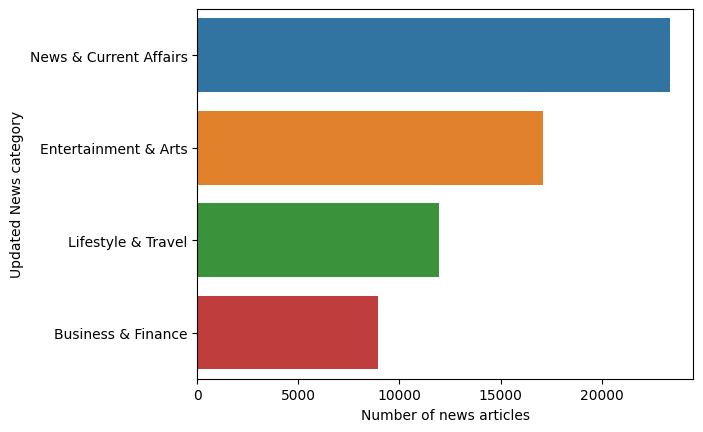

In [186]:
ax = plt.subplot()

sns.barplot(y = 'index', x = 'main_topic', data = number_of_articles_per_class)
plt.xlabel("Number of news articles")
plt.ylabel("Updated News category")

In [187]:
# get labels as numpy
targets = df.main_topic.to_numpy()
targets

array(['News & Current Affairs', 'News & Current Affairs',
       'News & Current Affairs', ..., 'Business & Finance',
       'Business & Finance', 'Business & Finance'], dtype=object)

In [188]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

targets1 = encoder.fit_transform(targets)

In [189]:
targets1

array([3, 3, 3, ..., 0, 0, 0])

In [191]:
targets

array(['News & Current Affairs', 'News & Current Affairs',
       'News & Current Affairs', ..., 'Business & Finance',
       'Business & Finance', 'Business & Finance'], dtype=object)

In [190]:
encoder.classes_

array(['Business & Finance', 'Entertainment & Arts', 'Lifestyle & Travel',
       'News & Current Affairs'], dtype=object)